# CSE 366: Artificial Intelligence - Computer Vision Assignment

# **Option 2: Object Detection**

*   YOLOv8
*   YOLOv9

I have choosen YOLOv8 for this Assignment.


Focus on detecting objects within the images, quantifying the precision, recall, and mAP (mean
Average Precision) of your model. Additionally, discuss the challenges faced during model
implementation and tuning.

In [ ]:
!nvidia-smi

Fri May 24 09:11:32 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   65C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


# Install YOLOv8


In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.9/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

# CLI

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="E1hGtr6i4h62dQB8As8d")
project = rf.workspace("assignment3-jew15").project("tomato-detection-i39mx")
version = project.version(1)
dataset = version.download("yolov8")


mkdir: cannot create directory ‘/content/datasets’: File exists
/content/datasets
loading Roboflow workspace...
loading Roboflow project...


# Custom Training

In [8]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=800 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 75.7MB/s]
New https://pypi.org/project/ultralytics/8.2.20 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/Tomato-Detection-1/data.yaml, epochs=25, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, str

In [9]:
!ls {HOME} /content/runs/detect/train2

ls: cannot access '/content/runs/detect/train2': No such file or directory
/content:
datasets  runs	yolov8n.pt  yolov8s.pt


/content


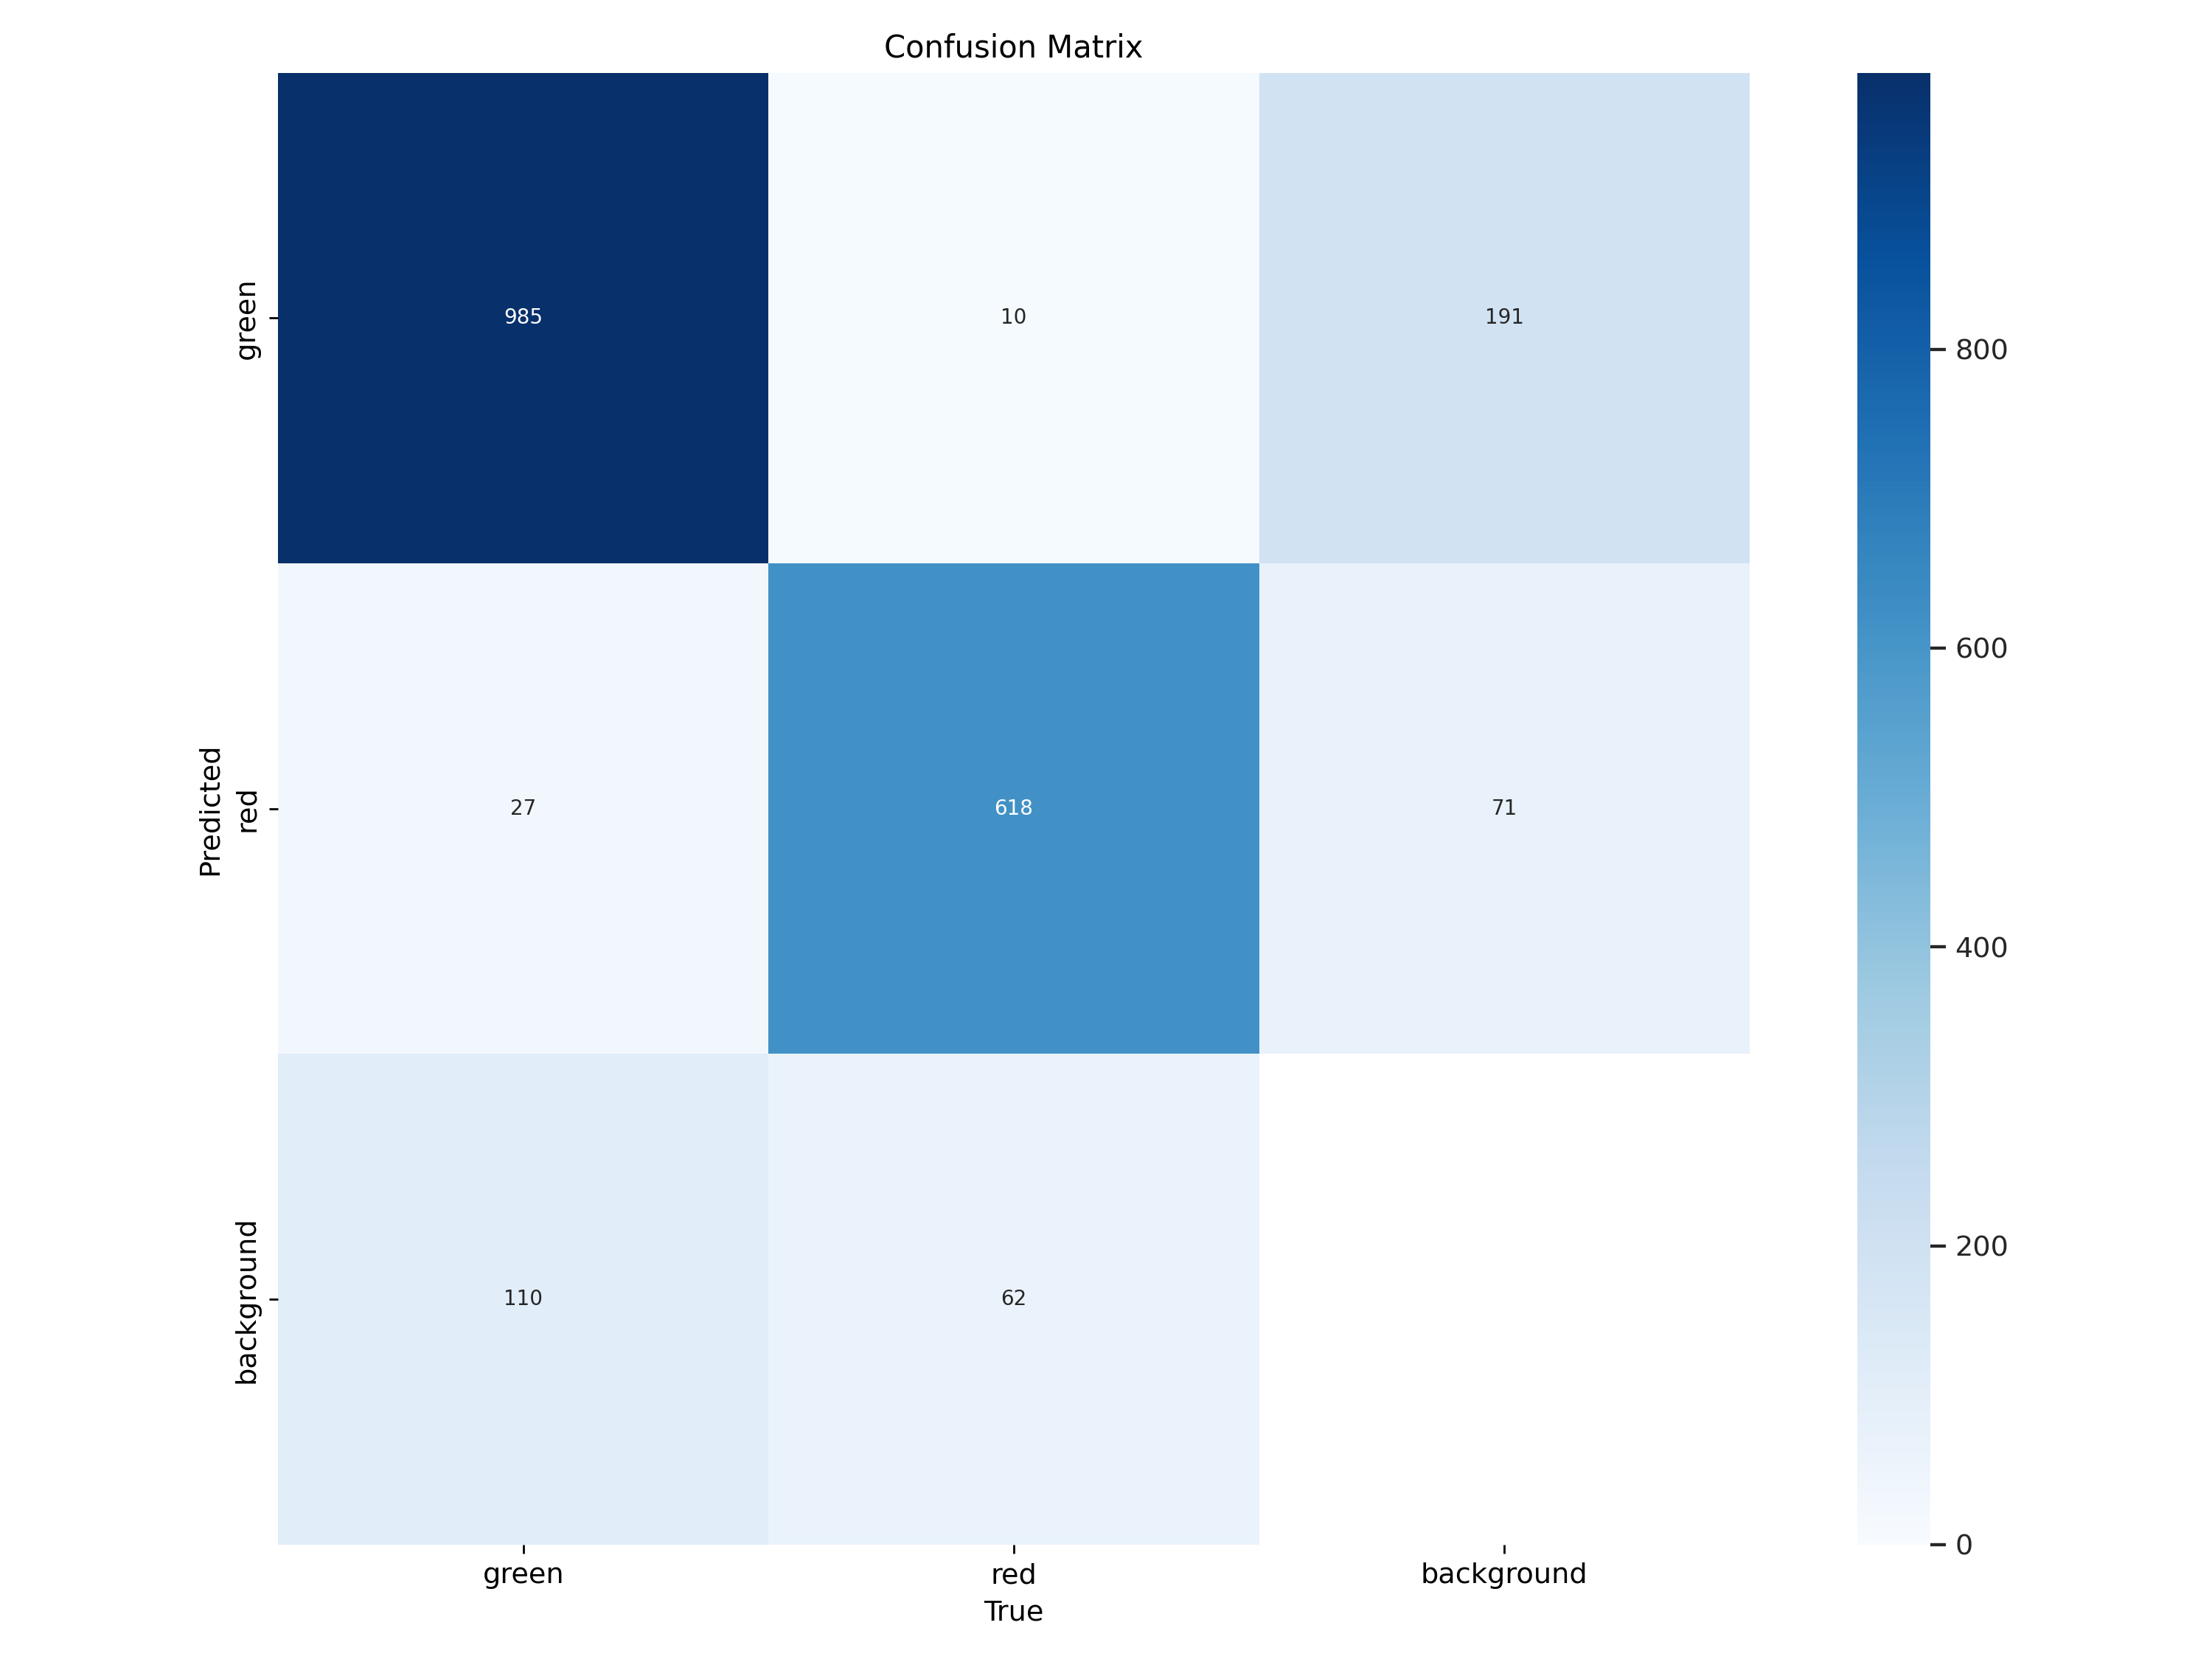

In [11]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=1000)

/content


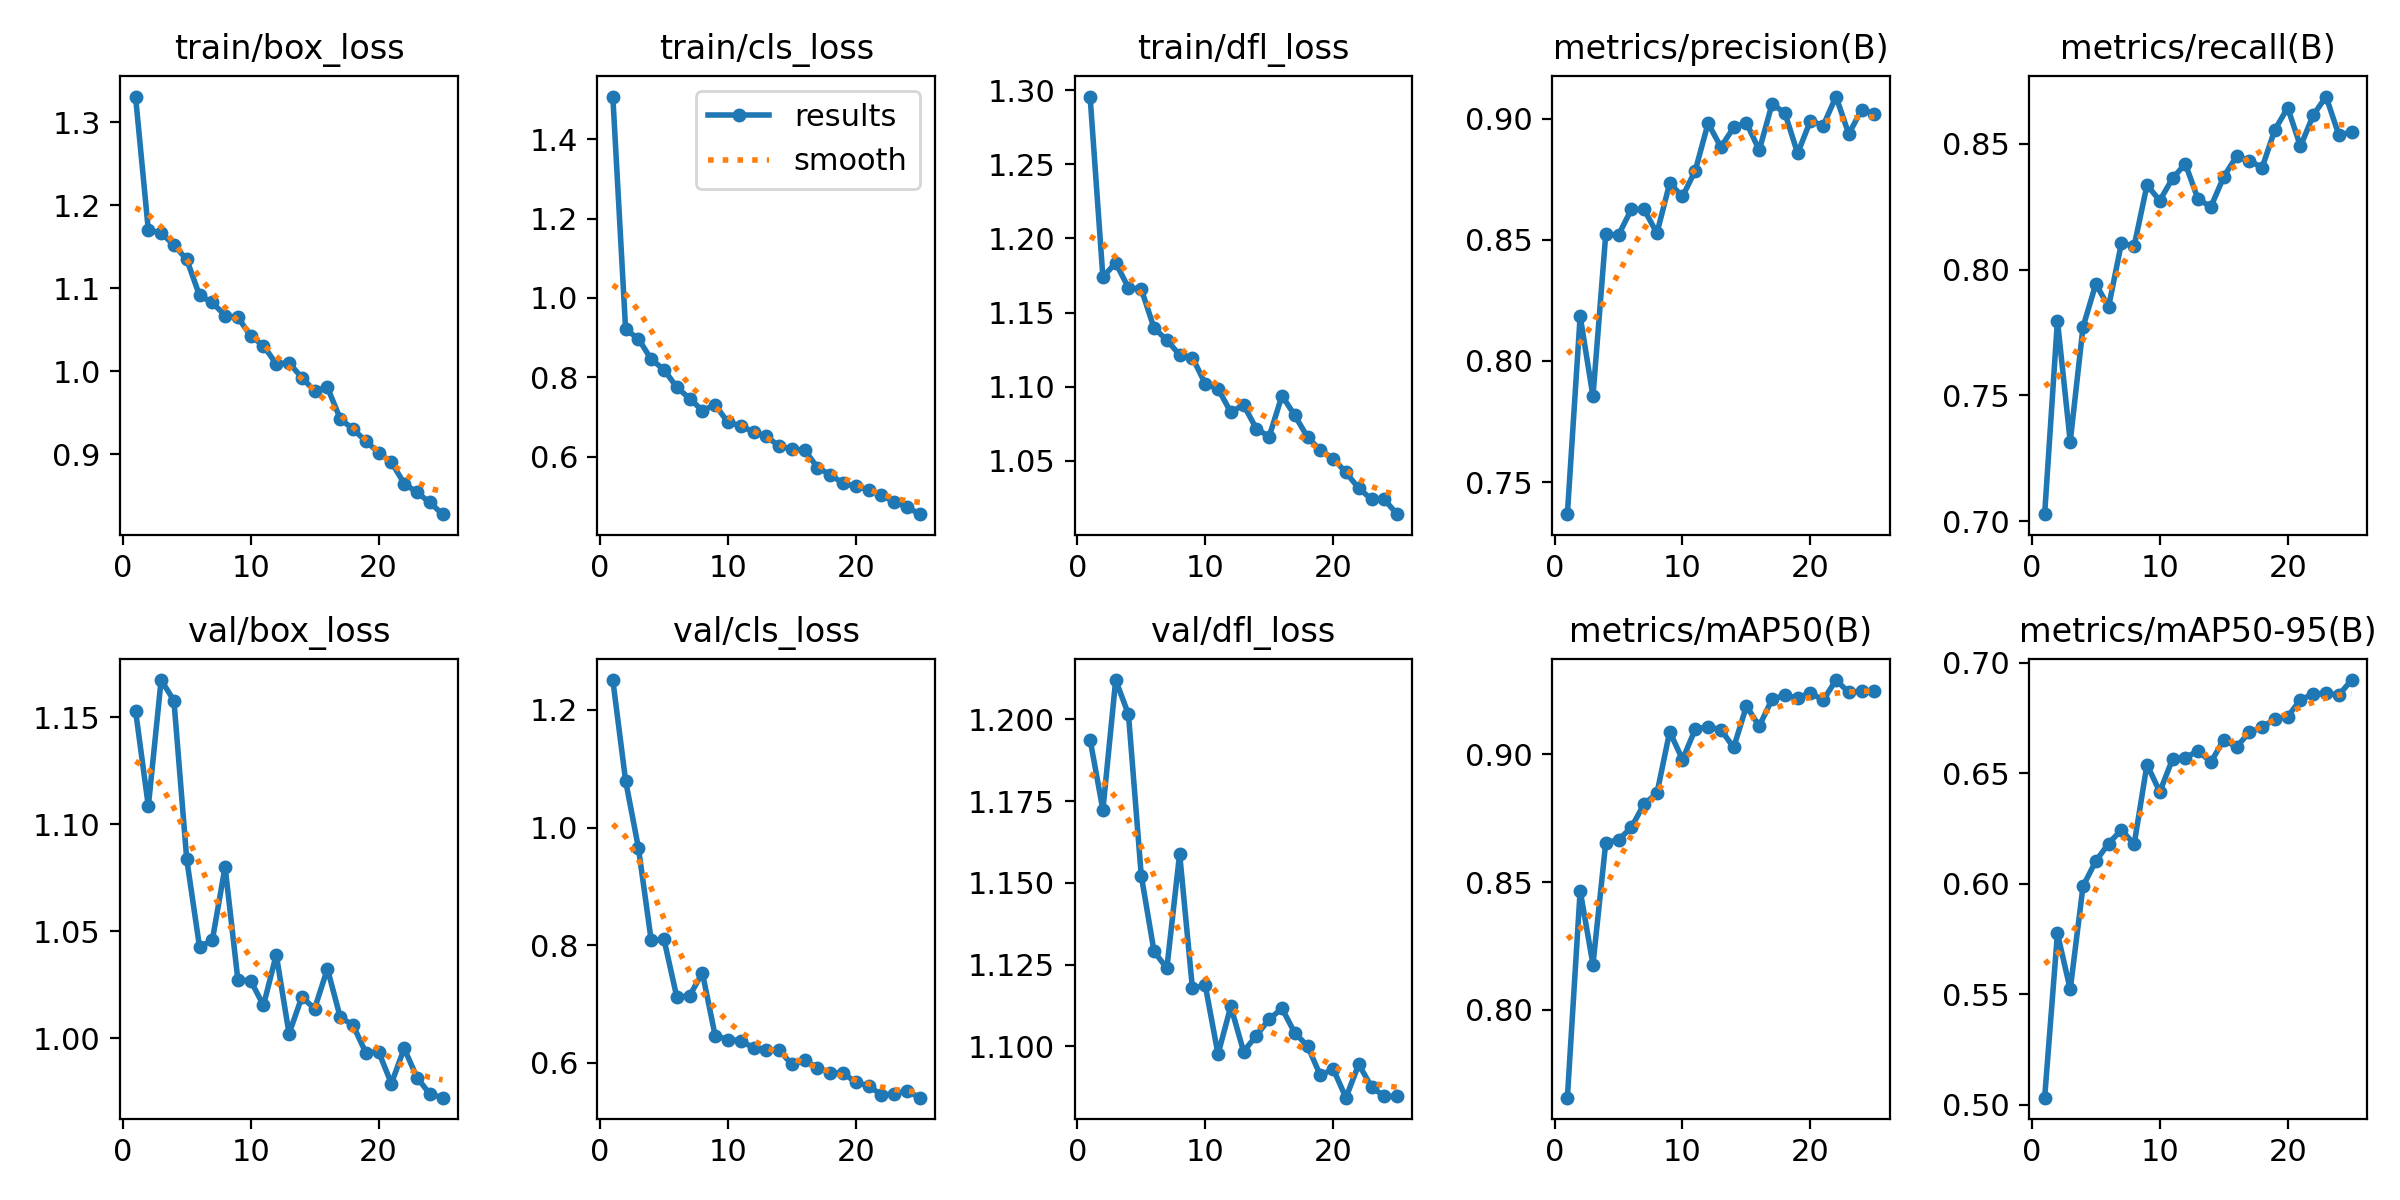

In [13]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=1000)

/content


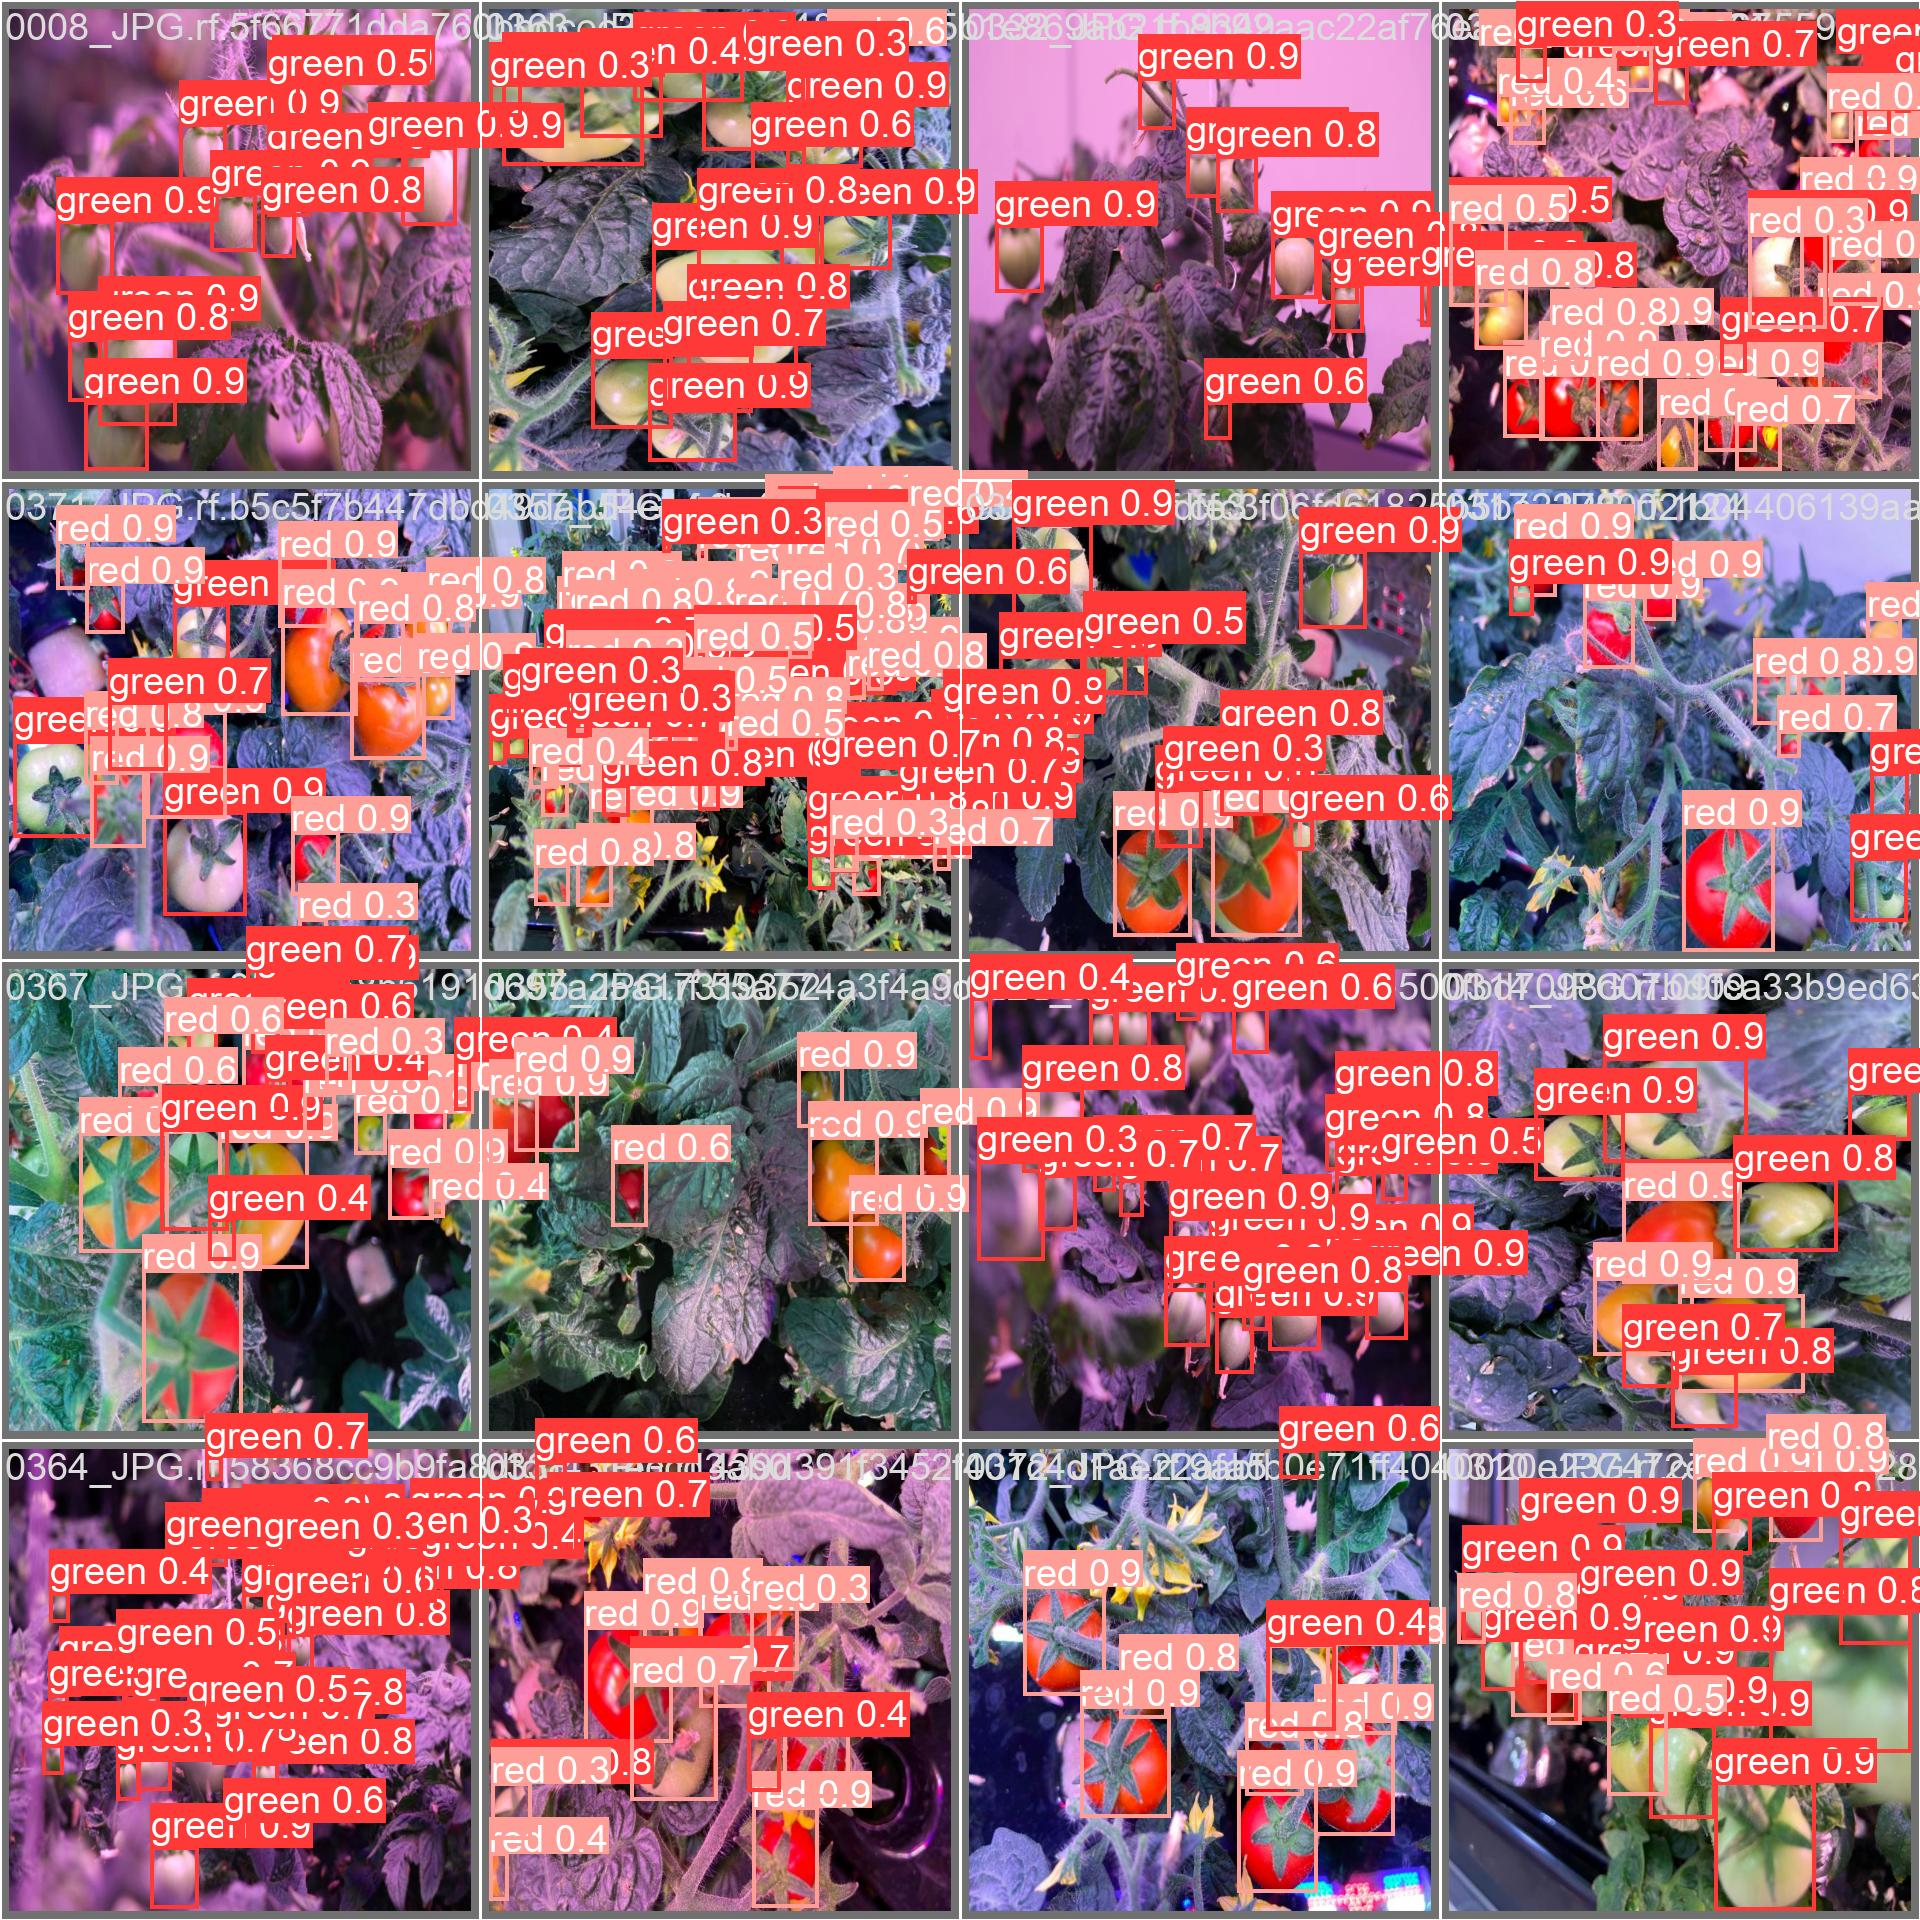

In [15]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=1100)

## Validate Custom Model

In [17]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/Tomato-Detection-1/valid/labels.cache... 104 images, 0 backgrounds, 0 corrupt: 100% 104/104 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 7/7 [00:15<00:00,  2.20s/it]
                   all        104       1812      0.902      0.854      0.925      0.693
                 green        104       1122      0.894      0.847      0.923       0.67
                   red        104        690       0.91      0.862      0.927      0.716
Speed: 9.3ms preprocess, 17.3ms inference, 0.0ms loss, 14.5ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


## Inference with Custom Model

In [19]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs

image 1/52 /content/datasets/Tomato-Detection-1/test/images/0002_JPG.rf.181ab17a286ce3d8ddbe5b6b6c9ad9c2.jpg: 800x800 22 greens, 43 reds, 22.5ms
image 2/52 /content/datasets/Tomato-Detection-1/test/images/0003_JPG.rf.2bd581ca06dbfaee805925d98321ab56.jpg: 800x800 12 greens, 22.5ms
image 3/52 /content/datasets/Tomato-Detection-1/test/images/0034_JPG.rf.cf256ad1df2e25f5db722a953c7e0b09.jpg: 800x800 1 green, 6 reds, 22.5ms
image 4/52 /content/datasets/Tomato-Detection-1/test/images/0037_JPG.rf.bf0cca5be1239a8ee397f5ea8f138196.jpg: 800x800 3 greens, 9 reds, 22.4ms
image 5/52 /content/datasets/Tomato-Detection-1/test/images/0041_JPG.rf.07a04ccbb73813d431a95c6f4330abcb.jpg: 800x800 6 greens, 19 reds, 22.3ms
image 6/52 /content/datasets/Tomato-Detection-1/test/images/0056_JPG.rf.fba11e01c0516dc0a0a064721679e65d.jpg: 8

**NOTE:** Let's take a look at few results.

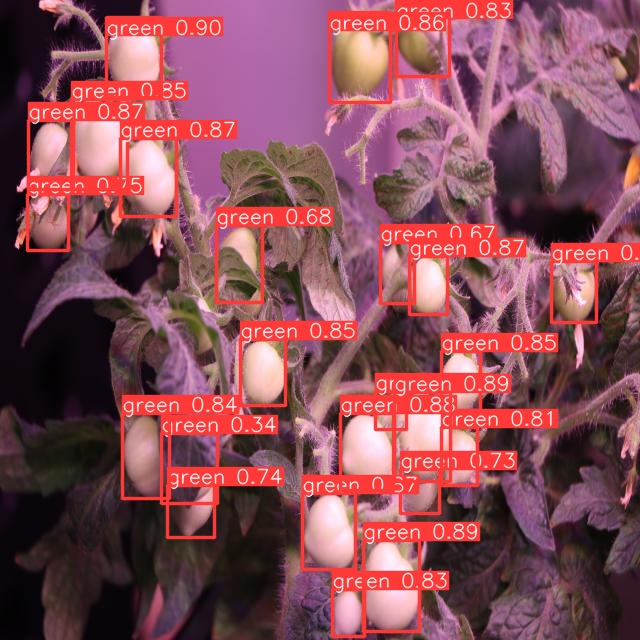

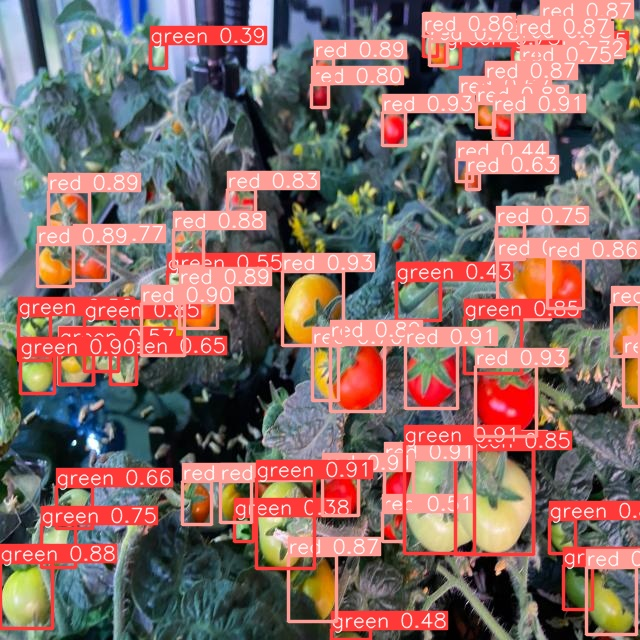

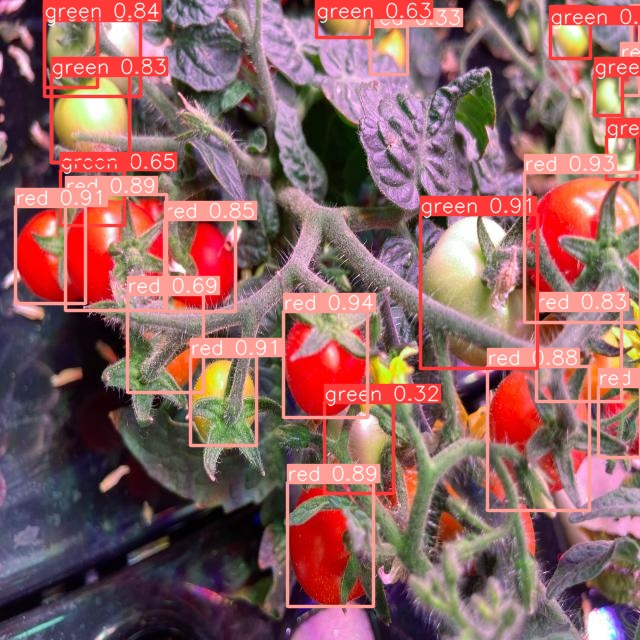

In [24]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=1000))
      print("\n")